Project 2
part 2

importing data and packages

In [123]:
import seaborn as sb
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import datetime as dt
%matplotlib inline

sb.set()

df = pd.read_csv("P2testing.csv")
df["Date"] = pd.to_datetime(df["Date"])

df.head()

#TODO emendar training set

,Date,AUD.USD,GBP.USD,CAD.USD,NLG.USD,FRF.USD,DEM.USD,JPY.USD,CHF.USD
0,1996-01-02,1.345352,0.642467,1.3577,1.6075,4.9025,1.4354,103.92,1.1573
1,1996-01-03,1.336005,0.644454,1.3530,1.6128,4.9180,1.4410,104.35,1.1605
2,1996-01-04,1.341742,0.646705,1.3541,1.6290,4.9625,1.4542,106.41,1.1737
3,1996-01-05,1.337793,0.644330,1.3573,1.6106,4.9230,1.4386,105.13,1.1605
4,1996-01-08,1.338151,0.645369,1.3609,1.6130,4.9370,1.4396,105.80,1.1631


display dataframe: changing settings

In [124]:
pd.options.display.max_rows = 20
pd.options.display.max_columns = 999

Visualization

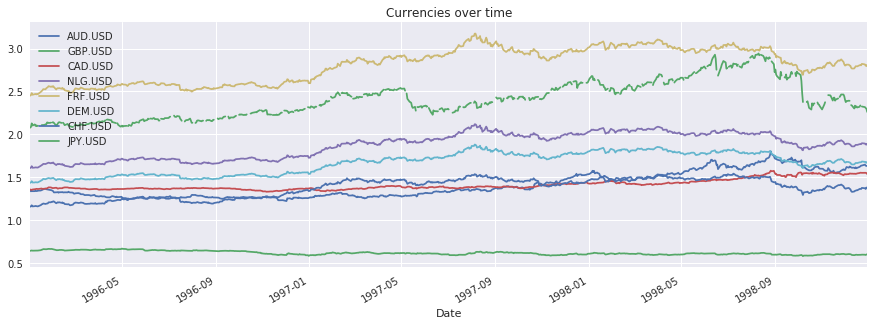

In [125]:
dfScaled = df.drop("JPY.USD",axis=1)
dfScaled["JPY.USD"] = df["JPY.USD"]/50
dfScaled["FRF.USD"] = dfScaled["FRF.USD"] /2
dfScaled.plot(x=dfScaled["Date"],figsize=(15,5),title="Currencies over time")
plt.savefig("report/Images/CurrenciesPart2.eps", dpi = 1200)

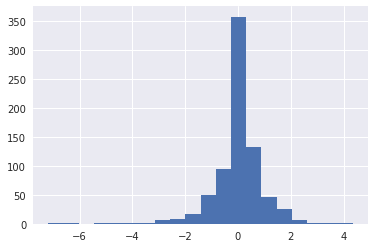

In [203]:
aux =  df["JPY.USD"]- df["JPY.USD"].shift()
aux[aux.isnull()] = 0
plt.hist(aux,bins=20)
plt.show()

Missing data (to predict)

In [126]:
print "total rows: " + `sum(df['JPY.USD']>0)`
print "to predict: " + `sum(df['JPY.USD'].isnull())`

total rows: 680
to predict: 75


Preprocessing

In [127]:
#initial date
d0 = pd.to_datetime("1979-12-30")

#creating a function that does the preprocessing for organization purposes
def datasetTransformation(dfRaw, k = 5):
    data = pd.DataFrame()
    #Date feature (converting to integer)
    data["Date"] = (dfRaw['Date'] - d0)  / np.timedelta64(1,'D')
    
    #Dummy Variables for weekdays
    weekday = dfRaw['Date'].dt.weekday_name
    data["Mon"] = [1 if day else 0 for day in weekday == "Monday"   ]
    data["Tue"] = [1 if day else 0 for day in weekday == "Tuesday"  ]
    data["Wed"] = [1 if day else 0 for day in weekday == "Wednesday"]
    data["Thu"] = [1 if day else 0 for day in weekday == "Thursday" ]
#    data["Fri"] = [1 if day else 0 for day in weekday == "Friday"   ]
    
    #We use the last k day's data from all currencies
    for i in range(1,k+1):
        for currency in ['JPY','AUD','GBP','CAD','NLG','FRF','DEM','CHF']:
            data[currency +`i`] = dfRaw[currency + '.USD'].shift(i)
    return data

#Getting target (for training set only)
def getTarget(dfRaw):
    targ = dfRaw["JPY.USD"]
    return targ

In [128]:
data = datasetTransformation(df)
data["Target"] = getTarget(df)
data

,Date,Mon,Tue,Wed,Thu,JPY1,AUD1,GBP1,CAD1,NLG1,FRF1,DEM1,CHF1,JPY2,AUD2,GBP2,CAD2,NLG2,FRF2,DEM2,CHF2,JPY3,AUD3,GBP3,CAD3,NLG3,FRF3,DEM3,CHF3,JPY4,AUD4,GBP4,CAD4,NLG4,FRF4,DEM4,CHF4,JPY5,AUD5,GBP5,CAD5,NLG5,FRF5,DEM5,CHF5,Target
0,5847.0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.92
1,5848.0,0,0,1,0,103.92,1.345352,0.642467,1.3577,1.6075,4.9025,1.4354,1.1573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.35
2,5849.0,0,0,0,1,104.35,1.336005,0.644454,1.3530,1.6128,4.9180,1.4410,1.1605,103.92,1.345352,0.642467,1.3577,1.6075,4.9025,1.4354,1.1573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.41
3,5850.0,0,0,0,0,106.41,1.341742,0.646705,1.3541,1.6290,4.9625,1.4542,1.1737,104.35,1.336005,0.644454,1.3530,1.6128,4.9180,1.4410,1.1605,103.92,1.345352,0.642467,1.3577,1.6075,4.9025,1.4354,1.1573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.13
4,5853.0,1,0,0,0,105.13,1.337793,0.644330,1.3573,1.6106,4.9230,1.4386,1.1605,106.41,1.341742,0.646705,1.3541,1.6290,4.9625,1.4542,1.1737,104.35,1.336005,0.644454,1.3530,1.6128,4.9180,1.4410,1.1605,103.92,1.345352,0.642467,1.3577,1.6075,4.9025,1.4354,1.1573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.80
5,5854.0,0,1,0,0,105.80,1.338151,0.645369,1.3609,1.6130,4.9370,1.4396,1.1631,105.13,1.337793,0.644330,1.3573,1.6106,4.9230,1.4386,1.1605,106.41,1.341742,0.646705,1.3541,1.6290,4.9625,1.4542,1.1737,104.35,1.336005,0.644454,1.3530,1.6128,4.9180,1.4410,1.1605,103.92,1.345352,0.642467,1.3577,1.6075,4.9025,1.4354,1.1573,104.90
6,5855.0,0,0,1,0,104.90,1.342823,0.646204,1.3616,1.6153,4.9420,1.4422,1.1658,105.80,1.338151,0.645369,1.3609,1.6130,4.9370,1.4396,1.1631,105.13,1.337793,0.644330,1.3573,1.6106,4.9230,1.4386,1.1605,106.41,1.341742,0.646705,1.3541,1.6290,4.9625,1.4542,1.1737,104.35,1.336005,0.644454,1.3530,1.6128,4.9180,1.4410,1.1605,105.28
7,5856.0,0,0,0,1,105.28,1.338867,0.646998,1.3649,1.6140,4.9320,1.4411,1.1635,104.90,1.342823,0.646204,1.3616,1.6153,4.9420,1.4422,1.1658,105.80,1.338151,0.645369,1.3609,1.6130,4.9370,1.4396,1.1631,105.13,1.337793,0.644330,1.3573,1.6106,4.9230,1.4386,1.1605,106.41,1.341742,0.646705,1.3541,1.6290,4.9625,1.4542,1.1737,104.80
8,5857.0,0,0,0,0,104.80,1.339585,0.647459,1.3645,1.6130,4.9420,1.4400,1.1617,105.28,1.338867,0.646998,1.3649,1.6140,4.9320,1.4411,1.1635,104.90,1.342823,0.646204,1.3616,1.6153,4.9420,1.4422,1.1658,105.80,1.338151,0.645369,1.3609,1.6130,4.9370,1.4396,1.1631,105.13,1.337793,0.644330,1.3573,1.6106,4.9230,1.4386,1.1605,105.07
9,5861.0,0,1,0,0,105.07,1.343183,0.645703,1.3625,1.6132,4.9380,1.4405,1.1605,104.80,1.339585,0.647459,1.3645,1.6130,4.9420,1.4400,1.1617,105.28,1.338867,0.646998,1.3649,1.6140,4.9320,1.4411,1.1635,104.90,1.342823,0.646204,1.3616,1.6153,4.9420,1.4422,1.1658,105.80,1.338151,0.645369,1.3609,1.6130,4.9370,1.4396,1.1631,NaN


Now comes the fun part!

Regression

$ ŷ_t = y_{t-1} + Date$

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 3.194e+04
Date:                Sun, 19 Nov 2017   Prob (F-statistic):               0.00
Time:                        11:03:10   Log-Likelihood:                -891.03
No. Observations:                 604   AIC:                             1788.
Df Residuals:                     601   BIC:                             1801.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8213      0.952      0.863      0.3

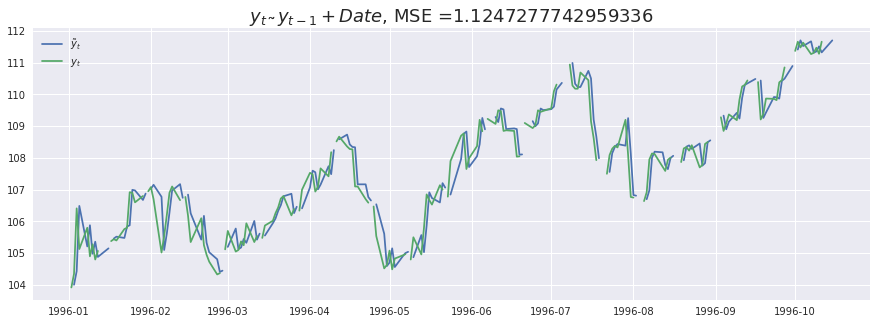

In [129]:
#simple model: ŷ_t = y_t-1 + Date

lmfit = smf.ols('Target~Date + JPY1', data = data).fit()
pred = lmfit.predict(data[["Date",'JPY1']])
#dfLinRegQuad.drop("Date",axis = 1).plot(x = dfLinRegQuad["Date"],figsize=(15,5))

print lmfit.summary()

print lmfit.mse_resid

plt.figure(figsize=(15,5))
plt.plot(df['Date'][0:200],         pred[0:200])
plt.plot(df['Date'][0:200],df['JPY.USD'][0:200])
plt.title("$y_t\ \~{} \ y_{t-1} + Date$, MSE =" + `lmfit.mse_resid`,fontsize = 18)
plt.legend(["$\~{y}_t$","$y_t$"])
plt.savefig("report/Images/LinReg.eps", dpi = 1200)

$ŷ_t = y_{t-1} $

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 6.396e+04
Date:                Sun, 19 Nov 2017   Prob (F-statistic):               0.00
Time:                        11:03:15   Log-Likelihood:                -891.10
No. Observations:                 604   AIC:                             1786.
Df Residuals:                     602   BIC:                             1795.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5290      0.475      1.113      0.2

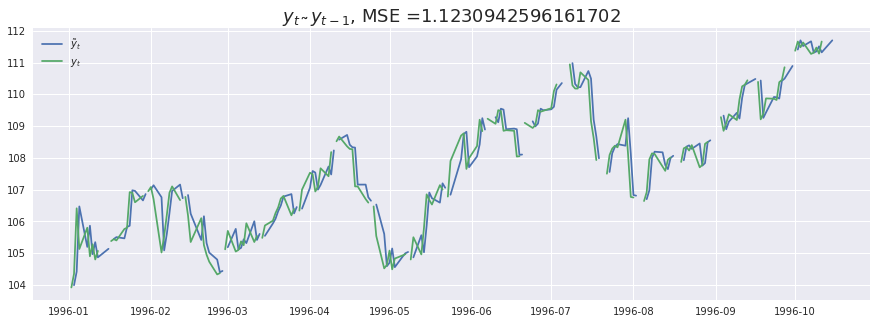

In [130]:
#simple model: ŷ_t = y_t-1 

lmfit = smf.ols('Target~ JPY1', data = data).fit()
pred = lmfit.predict(data['JPY1'])
#dfLinRegQuad.drop("Date",axis = 1).plot(x = dfLinRegQuad["Date"],figsize=(15,5))

print lmfit.summary()

print lmfit.mse_resid

plt.figure(figsize=(15,5))
plt.plot(df['Date'][0:200],         pred[0:200])
plt.plot(df['Date'][0:200],df['JPY.USD'][0:200])
plt.title("$y_t\ \~{} \ y_{t-1}$, MSE =" + `lmfit.mse_resid`,fontsize = 18)
plt.legend(["$\~{y}_t$","$y_t$"])
plt.savefig("report/Images/LinReg.eps", dpi = 1200)

All features

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     894.5
Date:                Sun, 19 Nov 2017   Prob (F-statistic):          1.40e-316
Time:                        11:03:16   Log-Likelihood:                -533.54
No. Observations:                 375   AIC:                             1157.
Df Residuals:                     330   BIC:                             1334.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9208      7.167     -0.128      0.8

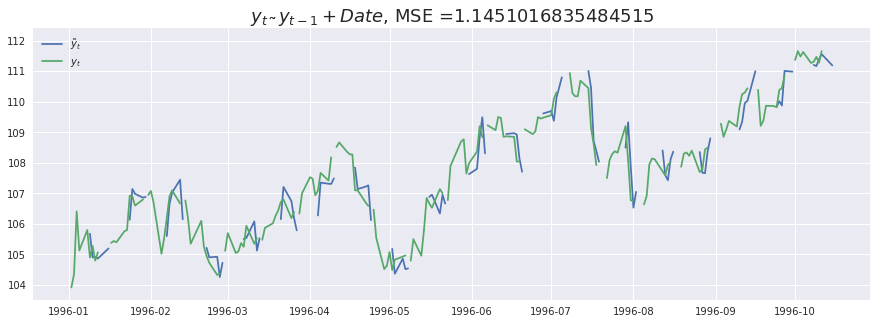

In [131]:
#simple model: ŷ_t = y_t-1 + Date

lmfit = smf.ols('Target~ Date + Mon + Tue + Wed + Thu  + JPY1 + AUD1 + GBP1 + CAD1 + NLG1 + FRF1 + DEM1 + CHF1 + JPY2+ AUD2 + GBP2 + CAD2 + NLG2+ FRF2+ DEM2+ CHF2+ JPY3+ AUD3+ GBP3+ CAD3+ NLG3+ FRF3+ DEM3+ CHF3+ AUD4+ GBP4+ CAD4+ NLG4+ FRF4+ DEM4+ CHF4+ JPY5+ AUD5+ GBP5+ CAD5+ NLG5+ FRF5+ DEM5+ CHF5', data = data).fit()
pred = lmfit.predict(data.drop('Target',axis = 1))

print lmfit.summary()

print lmfit.mse_resid

plt.figure(figsize=(15,5))
plt.plot(df['Date'][0:200],         pred[0:200])
plt.plot(df['Date'][0:200],df['JPY.USD'][0:200])
plt.title("$y_t\ \~{} \ y_{t-1} + Date$, MSE =" + `lmfit.mse_resid`,fontsize = 18)
plt.legend(["$\~{y}_t$","$y_t$"])
plt.savefig("report/Images/LinReg.eps", dpi = 1200)

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     2632.
Date:                Sun, 19 Nov 2017   Prob (F-statistic):               0.00
Time:                        11:03:17   Log-Likelihood:                -773.14
No. Observations:                 528   AIC:                             1590.
Df Residuals:                     506   BIC:                             1684.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7026      5.542      0.849      0.3

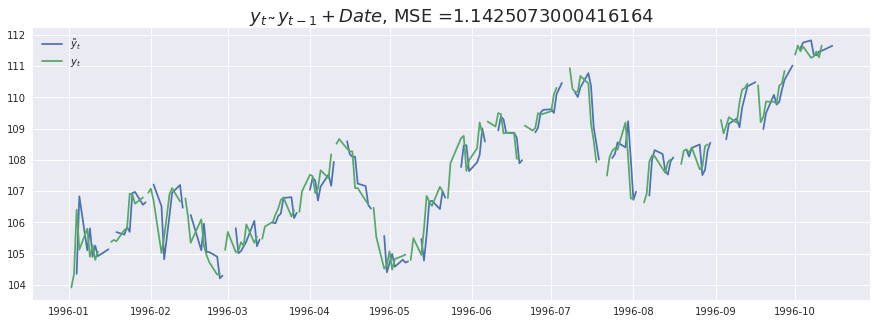

In [132]:
#simple model: ŷ_t = y_t-1 + Date

data2 = datasetTransformation(df,k=2)
data2['Target'] = getTarget(df)
lmfit = smf.ols('Target~ Date + Mon + Tue + Wed + Thu  + JPY1 + AUD1 + GBP1 + CAD1 + NLG1 + FRF1 + DEM1 + CHF1 + JPY2+ AUD2 + GBP2 + CAD2 + NLG2+ FRF2+ DEM2+ CHF2', data = data2).fit()
pred = lmfit.predict(data2.drop('Target',axis = 1))

print lmfit.summary()

print lmfit.mse_resid

plt.figure(figsize=(15,5))
plt.plot(df['Date'][0:200],         pred[0:200])
plt.plot(df['Date'][0:200],df['JPY.USD'][0:200])
plt.title("$y_t\ \~{} \ y_{t-1} + Date$, MSE =" + `lmfit.mse_resid`,fontsize = 18)
plt.legend(["$\~{y}_t$","$y_t$"])
plt.savefig("report/Images/LinReg.eps", dpi = 1200)

regression without time (date) 

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     3458.
Date:                Sun, 19 Nov 2017   Prob (F-statistic):               0.00
Time:                        11:03:18   Log-Likelihood:                -775.45
No. Observations:                 528   AIC:                             1585.
Df Residuals:                     511   BIC:                             1657.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.6883      3.676      2.091      0.0

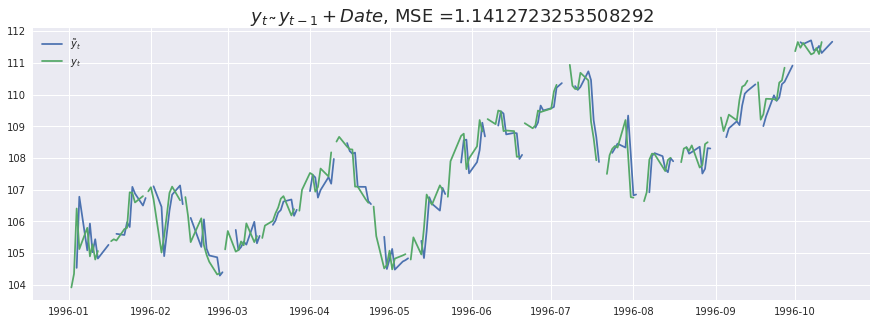

In [133]:
data2 = datasetTransformation(df,k=2)
data2['Target'] = getTarget(df)
lmfit = smf.ols('Target~ JPY1 + AUD1 + GBP1 + CAD1 + NLG1 + FRF1 + DEM1 + CHF1 + JPY2+ AUD2 + GBP2 + CAD2 + NLG2+ FRF2+ DEM2+ CHF2', data = data2).fit()
pred = lmfit.predict(data2.drop(['Target', 'Mon','Tue','Wed','Thu'],axis = 1))

print lmfit.summary()

print lmfit.mse_resid

plt.figure(figsize=(15,5))
plt.plot(df['Date'][0:200],         pred[0:200])
plt.plot(df['Date'][0:200],df['JPY.USD'][0:200])
plt.title("$y_t\ \~{} \ y_{t-1} + Date$, MSE =" + `lmfit.mse_resid`,fontsize = 18)
plt.legend(["$\~{y}_t$","$y_t$"])
plt.savefig("report/Images/LinReg2.eps", dpi = 1200)

# -------------------------------------------------------------------------------------------------------------

In [134]:
dfTrain = pd.read_csv("P2training.csv")
dfTrain["Date"] = pd.to_datetime(dfTrain["Date"])

dfTrain.columns = ['Date', 'AUD.USD', 'GBP.USD', 'CAD.USD', 'NLG.USD', 'FRF.USD',
       'DEM.USD', 'JPY.USD', 'CHF.USD']

print "total rows: " + `sum(dfTrain['JPY.USD']>0)`

dataTrain.set_index(["Date"])

print dfTrain.head()
dataTrain = datasetTransformation(dfTrain,k = 2)
dataTrain['Target'] = getTarget(dfTrain)

total rows: 4019
        Date   AUD.USD   GBP.USD  CAD.USD  NLG.USD  FRF.USD  DEM.USD  JPY.USD  \
0 1979-12-31  0.904404  0.450755   1.1684   1.9020   4.0175   1.7260   240.30   
1 1980-01-02  0.902527  0.445891   1.1658   1.8922   4.0150   1.7135   238.45   
2 1980-01-03  0.901388  0.446429   1.1703   1.8900   4.0100   1.7108   238.35   
3 1980-01-04  0.901713  0.447027   1.1687   1.8910   4.0250   1.7126   234.80   
4 1980-01-07  0.898311  0.442184   1.1694   1.8890   4.0090   1.7080   231.55   

   CHF.USD  
0   1.5950  
1   1.5775  
2   1.5720  
3   1.5755  
4   1.5700  


In [184]:
dfTest = pd.read_csv("P2testing.csv")
dfTest["Date"] = pd.to_datetime(dfTest["Date"])

#dfTest.columns = ['Date', 'AUD.USD', 'GBP.USD', 'CAD.USD', 'NLG.USD', 'FRF.USD',
#       'DEM.USD', 'JPY.USD', 'CHF.USD']

print "total rows: " + `sum(dfTest['JPY.USD']>0)`

dfTest.head()
dataTest = datasetTransformation(dfTest,k = 2)
dataTest['Target'] = getTarget(dfTest)
dataTest.head()

total rows: 680


,Date,Mon,Tue,Wed,Thu,JPY1,AUD1,GBP1,CAD1,NLG1,FRF1,DEM1,CHF1,JPY2,AUD2,GBP2,CAD2,NLG2,FRF2,DEM2,CHF2,Target
0,5847.0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.92
1,5848.0,0,0,1,0,103.92,1.345352,0.642467,1.3577,1.6075,4.9025,1.4354,1.1573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.35
2,5849.0,0,0,0,1,104.35,1.336005,0.644454,1.3530,1.6128,4.9180,1.4410,1.1605,103.92,1.345352,0.642467,1.3577,1.6075,4.9025,1.4354,1.1573,106.41
3,5850.0,0,0,0,0,106.41,1.341742,0.646705,1.3541,1.6290,4.9625,1.4542,1.1737,104.35,1.336005,0.644454,1.3530,1.6128,4.9180,1.4410,1.1605,105.13
4,5853.0,1,0,0,0,105.13,1.337793,0.644330,1.3573,1.6106,4.9230,1.4386,1.1605,106.41,1.341742,0.646705,1.3541,1.6290,4.9625,1.4542,1.1737,105.80


                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.708e+05
Date:                Sun, 19 Nov 2017   Prob (F-statistic):               0.00
Time:                        11:22:51   Log-Likelihood:                -6260.4
No. Observations:                4017   AIC:                         1.255e+04
Df Residuals:                    4000   BIC:                         1.266e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3032      0.390      3.342      0.0

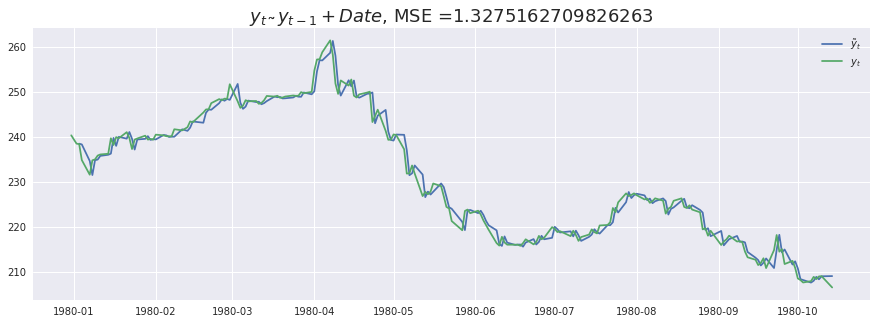

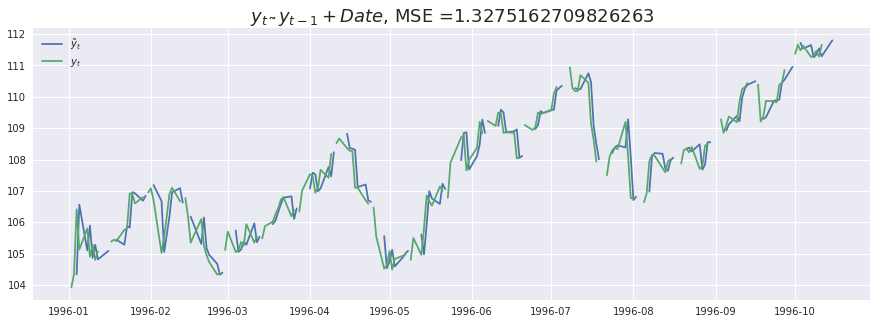

In [185]:
lmfit = smf.ols('Target~ JPY1 + AUD1 + GBP1 + CAD1 + NLG1 + FRF1 + DEM1 + CHF1 + JPY2+ AUD2 + GBP2 + CAD2 + NLG2+ FRF2+ DEM2+ CHF2', data = dataTrain).fit()

print lmfit.summary()

pred = lmfit.predict(dataTrain.drop(['Target', 'Mon','Tue','Wed','Thu'],axis = 1))
print "Train MSE: " + `lmfit.mse_resid`

plt.figure(figsize=(15,5))
plt.plot(dfTrain['Date'][0:200],             pred[0:200])
plt.plot(dfTrain['Date'][0:200],dfTrain['JPY.USD'][0:200])
plt.title("$y_t\ \~{} \ y_{t-1} + Date$, MSE =" + `lmfit.mse_resid`,fontsize = 18)
plt.legend(["$\~{y}_t$","$y_t$"])
plt.savefig("report/Images/LinRe3g.eps", dpi = 1200)


pred = lmfit.predict(dataTest.drop(['Target', 'Mon','Tue','Wed','Thu'],axis = 1))
print "Test  MSE: " + `lmfit.mse_resid`

plt.figure(figsize=(15,5))
plt.plot(dfTest['Date'][0:200],             pred[0:200])
plt.plot(dfTest['Date'][0:200],dfTest['JPY.USD'][0:200])
plt.title("$y_t\ \~{} \ y_{t-1} + Date$, MSE =" + `lmfit.mse_resid`,fontsize = 18)
plt.legend(["$\~{y}_t$","$y_t$"])
plt.savefig("report/Images/LinRe3g.eps", dpi = 1200)

Old good day before prediction

In [137]:
np.mean((dataTest['Target'] - dataTest['JPY1'])**2)

1.1217054635761594

In [192]:
cor = []
cordiff1= []
cordiff2= []
corrdiffPast2 = []
corrdiffPast3 = []
corrdiffPast4 = []
corrdiffPast5 = []
for currency in ['JPY','AUD','GBP','CAD','NLG','FRF','DEM','CHF']:
    JPY = dfTrain['JPY.USD']
    CUR = (dfTrain[currency + '.USD']).shift()
    CUR[0] = CUR[1]
    
    diffJPY = (JPY - JPY.shift(1))
    diffJPY[0] = 0
    diffCur = CUR - CUR.shift(1)
    diffCur[0] = 0

    diffCurPast2 = diffCur.shift()
    diffCurPast2[0]=0
    
    diffCurPast3 = diffCurPast2.shift()
    diffCurPast3[0]=0
    
    diffCurPast4 = diffCurPast3.shift()
    diffCurPast4[0]=0
    
    diffCurPast5 = diffCurPast4.shift()
    diffCurPast5[0]=0
    
    diffJPY2 = JPY + 2*JPY.shift(1) - JPY.shift(2)
    diffJPY2[0] = 0
    diffJPY2[1] = 0
    diffCur2 = CUR - 2*CUR.shift(1) + CUR.shift(2)
    diffCur2[0] = 0
    diffCur2[1] = 0
    
    cor1 = np.corrcoef(JPY,CUR)
    cor2 = np.corrcoef(diffJPY,diffCur)
    cor3 = np.corrcoef(diffJPY2,diffCur2)
    
    cor.append(cor1[0][1])
    cordiff1.append(cor2[0][1])
    cordiff2.append(cor3[0][1])
    
    corrdiffPast2.append(np.corrcoef(diffJPY,diffCurPast2)[0][1])
    corrdiffPast3.append(np.corrcoef(diffJPY,diffCurPast3)[0][1])
    corrdiffPast4.append(np.corrcoef(diffJPY,diffCurPast4)[0][1])
    corrdiffPast5.append(np.corrcoef(diffJPY,diffCurPast5)[0][1])

print np.transpose(cor)
print np.transpose(cordiff1)
print np.transpose(cordiff2)

print corrdiffPast2
print corrdiffPast3
print corrdiffPast4
print corrdiffPast5

[ 0.9997789  -0.60914623  0.09065097 -0.1319213   0.8371372   0.54356257
  0.8556803   0.88232618]
[ 0.03109065  0.00212791 -0.00515587  0.00622544  0.01492235  0.01743243
  0.00898792  0.02131087]
[ 0.0069282   0.00117993  0.00350315  0.00111801  0.00445561  0.00414549
  0.00460195  0.00455784]
[0.0152171531520884, 0.0016243463843799832, 0.002451427837847324, -0.0082483838931696751, 0.0035268650507369382, 0.0064902173846255072, 0.0067675190025836942, 0.0098482362327103751]
[0.046604059696631561, 0.030081838499777542, 0.014895369045576656, 0.0051663431408335188, 0.050341187573605013, 0.041143943886338213, 0.046190883052818925, 0.040436209774093158]
[0.023044521508304081, 0.015049303797268843, 0.003348026355346265, 0.0068539791785772073, 0.0089738495354093825, 0.0062239551125917716, 0.0063670947239932805, 0.011974834371140658]
[0.031207390754108274, 0.0024877236012527722, 0.024779905974903718, 0.030012970723659448, 0.02485182874121988, 0.032091518123582907, 0.032704613134206778, 0.03651